In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

1. EDA

In [2]:
data  = pd.read_csv('./Mall_Customers.csv')
print(data.shape)
data.head(10)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


VARIABLES NUMÉRICAS Y CATEGÓRICAS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


DESCRIPCIÓN DE LOS DATOS

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


VERIFICACIÓN DE LOS VALORES NULOS EN EL DATASET

In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [6]:
print("Cantidad de valores faltantes para CustomerID ",data['CustomerID'].isnull().sum())
print("Cantidad de valores faltantes para Gender ",data['Gender'].isnull().sum())
print("Cantidad de valores faltantes para Age ",data['Age'].isnull().sum())
print("Cantidad de valores faltantes para Annual Income (k$) ",data['Annual Income (k$)'].isnull().sum())
print("Cantidad de valores faltantes para Spending Score (1-100) ",data['Spending Score (1-100)'].isnull().sum())

Cantidad de valores faltantes para CustomerID  0
Cantidad de valores faltantes para Gender  0
Cantidad de valores faltantes para Age  0
Cantidad de valores faltantes para Annual Income (k$)  0
Cantidad de valores faltantes para Spending Score (1-100)  0


EL DATASET NO PRESENTA VALORES NULOS EN NINGUNO DE SUS CAMPOS

IDENTIFICACIÓN DE VALORES ATÍPICOS

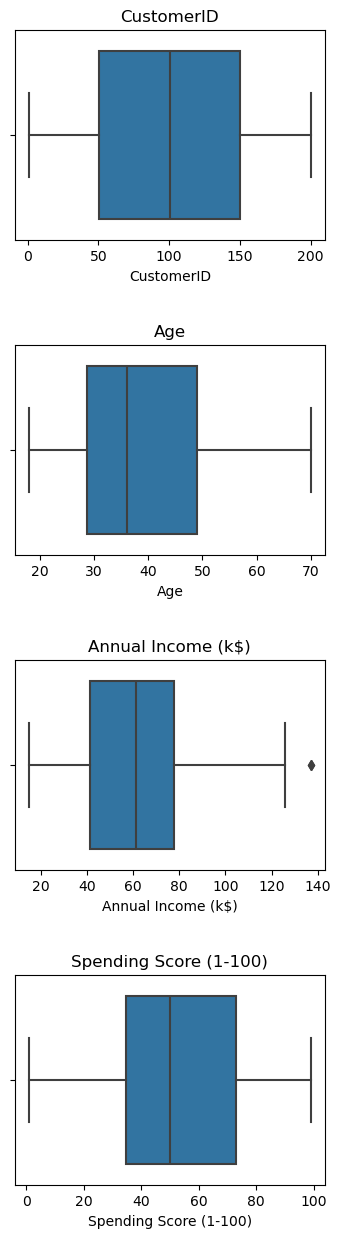

In [7]:
columns_num = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']

fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(4,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

3. Seleccionar las características más relevantes para entrenar al modelo

- Característica de interés: 

In [8]:
data =data[['Age','Annual Income (k$)','Spending Score (1-100)']]
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Grafica sin agrupamiento

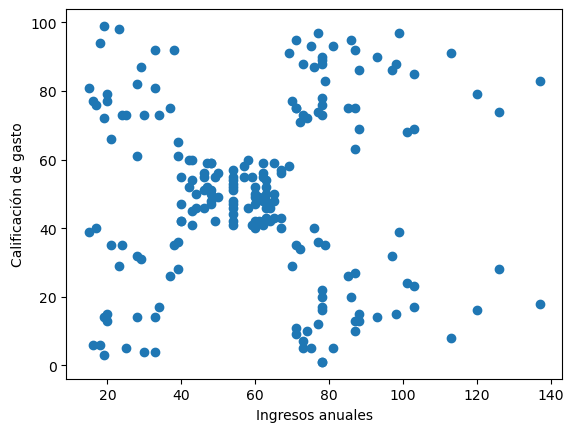

In [9]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Ingresos anuales')
plt.ylabel('Calificación de gasto')
plt.show()

ENTRENAR EL MODELO CONFIGURANDO LOS DIFERENTES HIPERPARÁMETROS

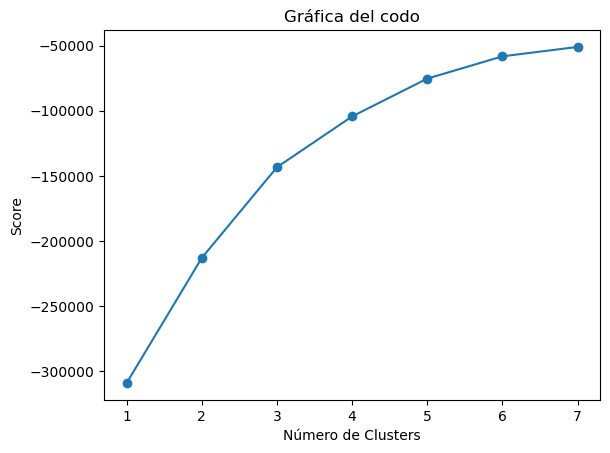

In [10]:
Nc = range(1,8)

kmeans=[KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score

plt.plot(Nc,score,marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica del codo')
plt.show()

GENERACIÓN DEL MODELO Y AGRUPAMIENTO

In [11]:
Modelo  = KMeans(n_clusters=5,random_state=0)
Modelo.fit(data)

KMeans(n_clusters=5, random_state=0)

In [12]:
#SE AGREGA LA COLUMNA GRUPO AL DATASET PARA IDENTIFICAR EL GRUPO DEL AGRUPAMIENTO
Modelo.labels_
data['Grupo'] = Modelo.labels_
print(data)

     Age  Annual Income (k$)  Spending Score (1-100)  Grupo
0     19                  15                      39      0
1     21                  15                      81      4
2     20                  16                       6      0
3     23                  16                      77      4
4     31                  17                      40      0
..   ...                 ...                     ...    ...
195   35                 120                      79      1
196   45                 126                      28      3
197   32                 126                      74      1
198   32                 137                      18      3
199   30                 137                      83      1

[200 rows x 4 columns]


5. EVALUAR EL DESEMPEÑO DEL MODELO CON MÉTRICAS COMO COEFICIENTE DE SILHOUETTE, ÍNDICE DE CALINSKI-HARABASZ, ECT.

In [13]:
Observaciones = len(data)
#data sin variable sin campo 'Grupo'
X = data.drop('Grupo', axis=1)
#data solo con el campo 'Grupo'
clusters = data['Grupo']

#Cálculo de las métricas
sil_score = silhouette_score(X,clusters)
calinski_score = calinski_harabasz_score(X,clusters)
davies_score = davies_bouldin_score(X,clusters)

table_data = [
    ['Número de observaciones',Observaciones],
    ['Coeficiente Silhouette',sil_score],
    ['Índice Calinski Harabasz',calinski_score],
    ['Índice Davies Bouldin',davies_score],
]

from tabulate import tabulate
print(tabulate(table_data,headers=['Metrica','Valor'],tablefmt='pretty'))

+--------------------------+---------------------+
|         Metrica          |        Valor        |
+--------------------------+---------------------+
| Número de observaciones  |         200         |
|  Coeficiente Silhouette  | 0.44428597560893024 |
| Índice Calinski Harabasz | 151.04386000160667  |
|  Índice Davies Bouldin   | 0.8218781633199781  |
+--------------------------+---------------------+


6. REALIZAR LAS DIFERENTES GRÁFICAS QUE PERMITAN VISUALIZAR LOS RESULTADOS DEL MODELO

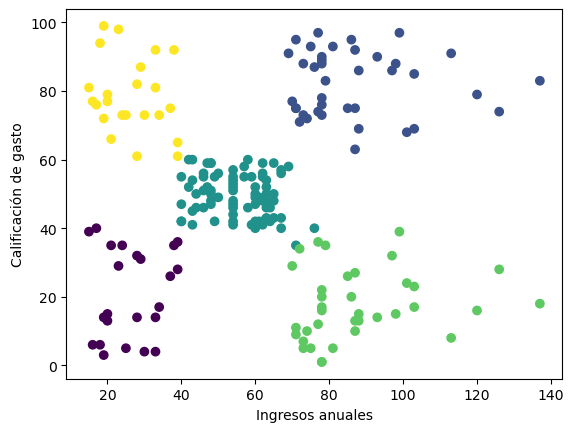

In [14]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Grupo'], cmap='viridis')
plt.xlabel('Ingresos anuales')
plt.ylabel('Calificación de gasto')
plt.show()

7. INTERPRETAR, ANALIZAR Y DOCUMENTAR LOS RESULTADOS OBTENIDOS

**Coeficiente Silhouette:** Dado que el coeficiente de Silhouette es una medida de cuán bien definidos están los grupos en relación con la separación entre ellos y teniendo en cuenta el resultado de 0.444 se puede afirmar que es un resultado alto y positivo, lo cual indica que los grupos están bien definidos y separados entre si.

**Índice Calinski Harabasz:** dado que un valor más alto de CH indica una mejor separación entre los grupos y una menor dispersión dentro de los grupos, se puede afirmar que la separación obtenida por el algoritmo k-means es de buena calidad. 

**Índice Davies Bouldin:** el valor de 0.822 indica que los grupos están relativamente bien separados entre sí y que la dispersión dentro de los grupos es moderada. Esto sugiere que la partición de los datos producida por el algoritmo de k-means es de buena calidad, con grupos que están tanto separados como compactos dentro de sí mismos.